# <font color = "blue">Task 1</font> - Graduate Admissions

# <font color = "red">Problem Statement</font>
   ####  Based on the historical data of admitted students in the university, the chance of current students admission will be predicted using machine learning algorithms.

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression as LR

from sklearn.metrics import mean_absolute_error as mae, r2_score, mean_squared_error, mean_absolute_error

from math import sqrt

## Loading the csv file

In [2]:
df=pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
df.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
474,475,308,105,4,3.0,2.5,7.95,1,0.67
317,318,300,99,1,1.0,2.5,8.01,0,0.58
276,277,329,113,5,5.0,4.5,9.45,1,0.89
331,332,311,105,2,3.0,2.0,8.12,1,0.73
169,170,311,99,2,2.5,3.0,7.98,0,0.65


In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
df.shape

(500, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Missing values

In [8]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
df.duplicated().sum()

0

## Creating a copy and removing the Sl.No column

In [10]:
df1=df.copy()
df1.drop(['Serial No.'],axis=1,inplace=True)

#### There are no missing and duplicated values in the dataset

## Identifying & Removing outliers

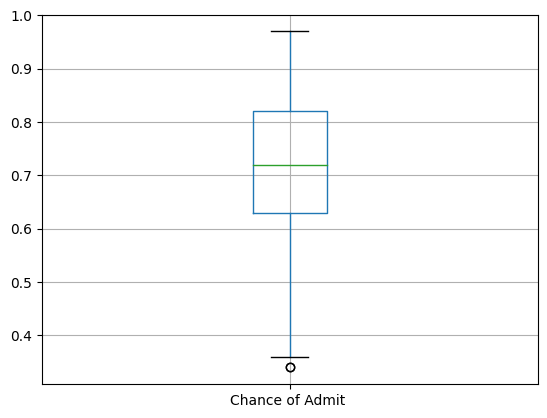

In [11]:
df1.boxplot(column=['Chance of Admit '])
plt.show()

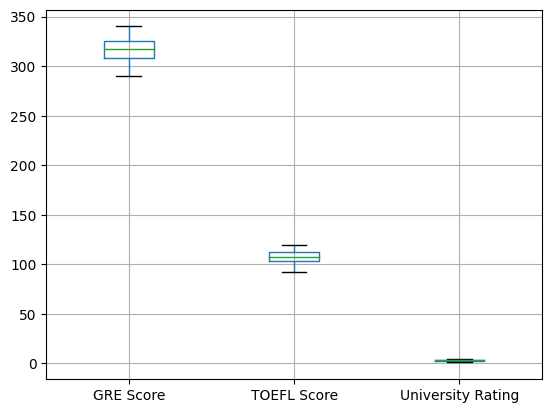

In [12]:
df1.boxplot(column=['GRE Score', 'TOEFL Score', 'University Rating'])
plt.show()

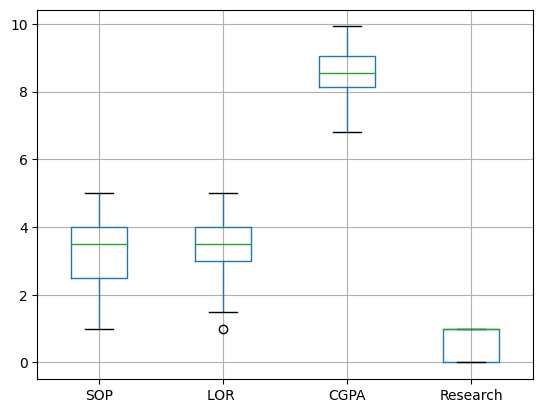

In [13]:
df1.boxplot(column=['SOP','LOR ', 'CGPA', 'Research'])
plt.show()

#### As we can see there are outliers in chance of admit & LOR columns.

In [14]:
Q1=df1.quantile(0.25)
Q3=df1.quantile(0.75)
IQR=Q3-Q1
IQR

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.9125
Research              1.0000
Chance of Admit       0.1900
dtype: float64

In [15]:
#upper limit
UL=Q3+IQR*1.5
print(UL)

#lower limit
LL=Q1-IQR*1.5
print(LL)

GRE Score            350.50000
TOEFL Score          125.50000
University Rating      7.00000
SOP                    6.25000
LOR                    5.50000
CGPA                  10.40875
Research               2.50000
Chance of Admit        1.10500
dtype: float64
GRE Score            282.50000
TOEFL Score           89.50000
University Rating     -1.00000
SOP                    0.25000
LOR                    1.50000
CGPA                   6.75875
Research              -1.50000
Chance of Admit        0.34500
dtype: float64


In [16]:
df_outliers_removed=df1[(df1>LL) & (df1<UL)]
df_outliers_removed

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [17]:
df_outliers_removed.isnull().sum()

GRE Score             0
TOEFL Score           0
University Rating     0
SOP                   0
LOR                  12
CGPA                  0
Research              0
Chance of Admit       2
dtype: int64

## Droppimg the null values

In [18]:
df_outliers_removed.dropna(inplace = True)

In [19]:
df_outliers_removed.shape

(486, 8)

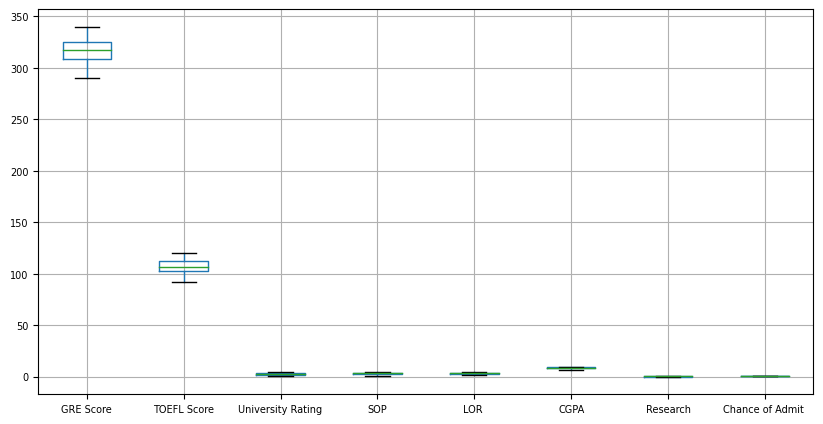

In [20]:
df_outliers_removed.boxplot(figsize=(10,5),fontsize=7)
plt.show()

#### As we can see there are no outliers anymore.

In [21]:
df2=df_outliers_removed.copy()

## Univariate analysis

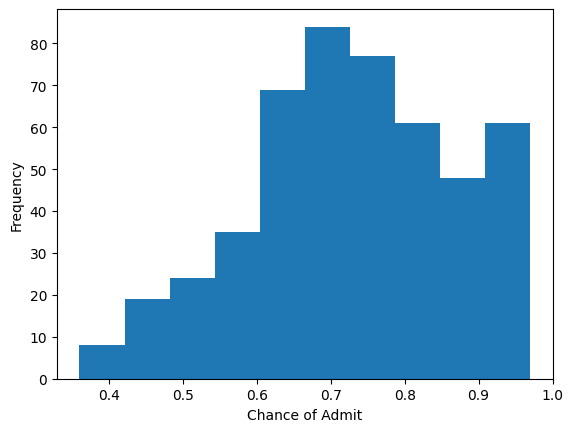

In [22]:
df2['Chance of Admit '].plot.hist()
plt.xlabel('Chance of Admit')
plt.show()

#### There is some variation in data,so it is useful for the prediction.

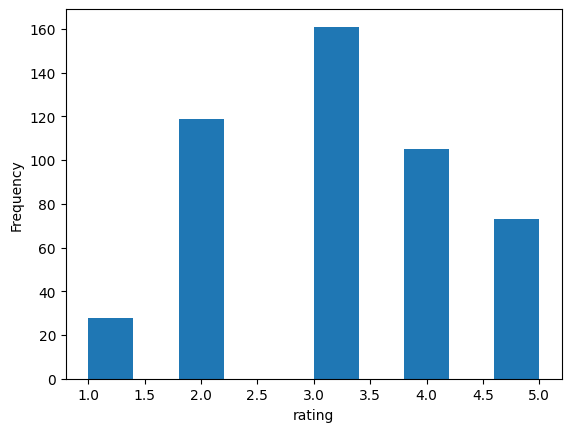

In [23]:
df2['University Rating'].plot.hist()
plt.xlabel('rating')
plt.show()

#### As we can see the maximun no.of students are getting rating from 3 to 3.5

In [24]:
df2['Research'].value_counts()

1    277
0    209
Name: Research, dtype: int64

#### We can say that 277 students have research experience and 209 students have no experience

## Bi-variate analysis

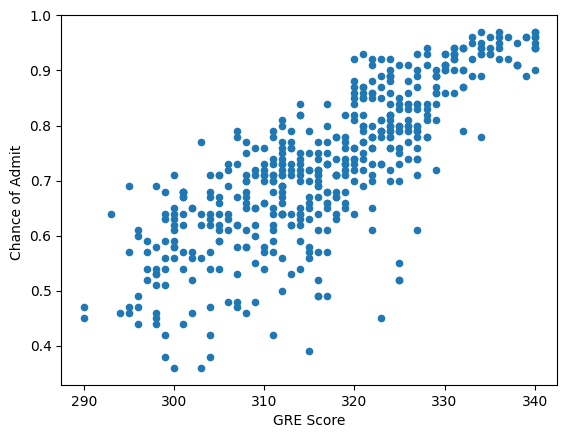

In [25]:
df2.plot.scatter('GRE Score','Chance of Admit ')
plt.show()

In [26]:
df2['Chance of Admit '].corr(df2['GRE Score'])

0.8031896044373015

#### As chance of admit and GRE score are positively correlated i.e.. if GRE score increases there is more chance of getting admission.

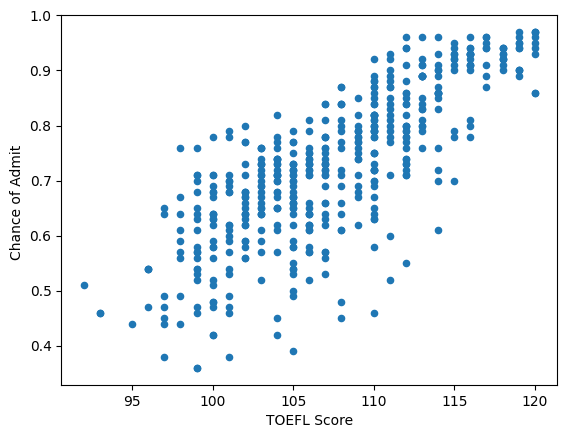

In [27]:
df2.plot.scatter('TOEFL Score','Chance of Admit ')
plt.show()

In [28]:
df2['TOEFL Score'].corr(df2['Chance of Admit '])

0.7857296232445918

#### As chance of admit and TOEFL score are positively correlated i.e.. if TOEFL score increases there is more chance of getting admission.

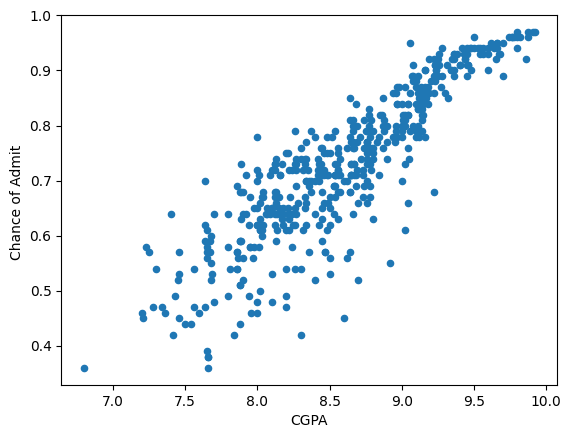

In [29]:
df2.plot.scatter('CGPA','Chance of Admit ')
plt.show()

In [30]:
df2['CGPA'].corr(df2['Chance of Admit '])

0.8821495912854789

#### As chance of admit and CGPA are positively correlated i.e.. if CGPA increases there is more chance of getting admission.

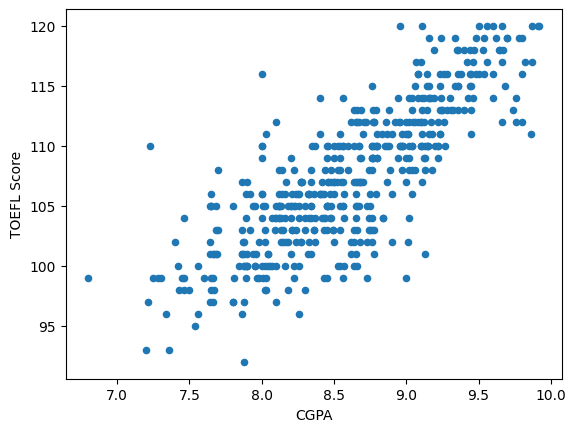

In [31]:
df2.plot.scatter('CGPA','TOEFL Score')
plt.show()

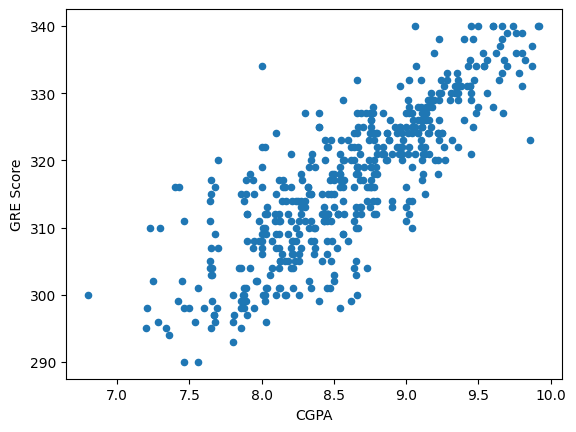

In [32]:
df2.plot.scatter('CGPA','GRE Score')
plt.show()

In [33]:
df2['CGPA'].corr(df2['GRE Score'])

0.8208424849253344

In [34]:
df2['CGPA'].corr(df2['TOEFL Score'])

0.8081094221483263

#### Students who have good CGPA , will definitely get a good score in TOEFL and GRE exams.

## Separating x and y

In [35]:
x=df2.drop(['Chance of Admit '],axis=1)
y=df2['Chance of Admit ']
x.shape,y.shape

((486, 7), (486,))

In [36]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=56)

## Fitting the data into a linear regression model

In [37]:
lr=LR()

In [38]:
lr.fit(train_x,train_y)

LinearRegression()

## Predicting over train and test set

In [39]:
train_pre=lr.predict(train_x)
mae_train=mae(train_pre,train_y)

In [40]:
mae_train

0.04052008959676384

In [41]:
test_pre=lr.predict(test_x)
mae_test=mae(test_pre,test_y)

In [42]:
mae_test

0.04345173324962815

## Model Evaluation

In [43]:
n = len(train_x)
m=len(test_x)

### Train data

In [44]:
RMSE = np.sqrt(mean_squared_error(train_y,train_pre))
MSE = mean_squared_error(train_y, train_pre)
MAE = mean_absolute_error(train_y, train_pre)
r2_train = r2_score(train_y, train_pre)
adj_r2 = 1-(1-r2_train)*(n-1)/(n-mae_train-1)
print(RMSE)
print(MSE)
print(MAE)
print(r2_train)
print(adj_r2)

0.0572018808365434
0.003272055171238111
0.04052008959676384
0.8186071138689355
0.8185868635203288


### Test data

In [45]:
RMSE_test = np.sqrt(mean_squared_error(test_y,test_pre))
MSE_test = mean_squared_error(test_y, test_pre)
MAE_test = mean_absolute_error(test_y, test_pre)
r2_test = r2_score(test_y, test_pre)
adj_r2_test = 1-(1-r2_test)*(m-1)/(m-mae_test-1)
print(RMSE_test)
print(MSE_test)
print(MAE_test)
print(r2_test)
print(adj_r2_test)

0.06207177414999459
0.003852905146127937
0.04345173324962815
0.8081700586095103
0.8081011467270034


## Accuracy of the model

In [46]:
print('Accuracy of train set :',r2_train)
print('Accuracy of test set :',r2_test)

Accuracy of train set : 0.8186071138689355
Accuracy of test set : 0.8081700586095103
